In [45]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [46]:
data = pd.read_csv('bank-full.csv',delimiter=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# EDA 

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [48]:
data.drop(columns=['age','job','marital','education','default','contact','day','month'], inplace=True)

In [49]:
data.head()

,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,2143,yes,no,261,1,-1,0,unknown,no
1,29,yes,no,151,1,-1,0,unknown,no
2,2,yes,yes,76,1,-1,0,unknown,no
3,1506,yes,no,92,1,-1,0,unknown,no
4,1,no,no,198,1,-1,0,unknown,no


In [50]:
data.columns

Index(['balance', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [51]:
df = data.loc[:,['balance','housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']]
df

,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,2143,yes,no,261,1,-1,0,unknown,no
1,29,yes,no,151,1,-1,0,unknown,no
2,2,yes,yes,76,1,-1,0,unknown,no
3,1506,yes,no,92,1,-1,0,unknown,no
4,1,no,no,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...
45206,825,no,no,977,3,-1,0,unknown,yes
45207,1729,no,no,456,2,-1,0,unknown,yes
45208,5715,no,no,1127,5,184,3,success,yes
45209,668,no,no,508,4,-1,0,unknown,no


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   balance   45211 non-null  int64 
 1   housing   45211 non-null  object
 2   loan      45211 non-null  object
 3   duration  45211 non-null  int64 
 4   campaign  45211 non-null  int64 
 5   pdays     45211 non-null  int64 
 6   previous  45211 non-null  int64 
 7   poutcome  45211 non-null  object
 8   y         45211 non-null  object
dtypes: int64(5), object(4)
memory usage: 3.1+ MB


In [53]:
df.describe()

,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,258.163080,2.763841,40.197828,0.580323
std,3044.765829,257.527812,3.098021,100.128746,2.303441
min,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,102127.000000,4918.000000,63.000000,871.000000,275.000000


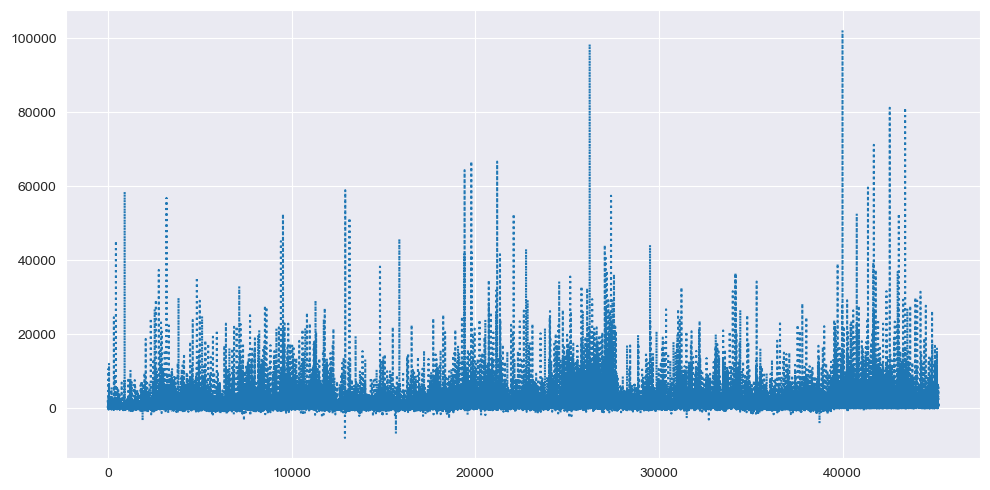

In [54]:
plt.plot(df['balance'], ls = ':')

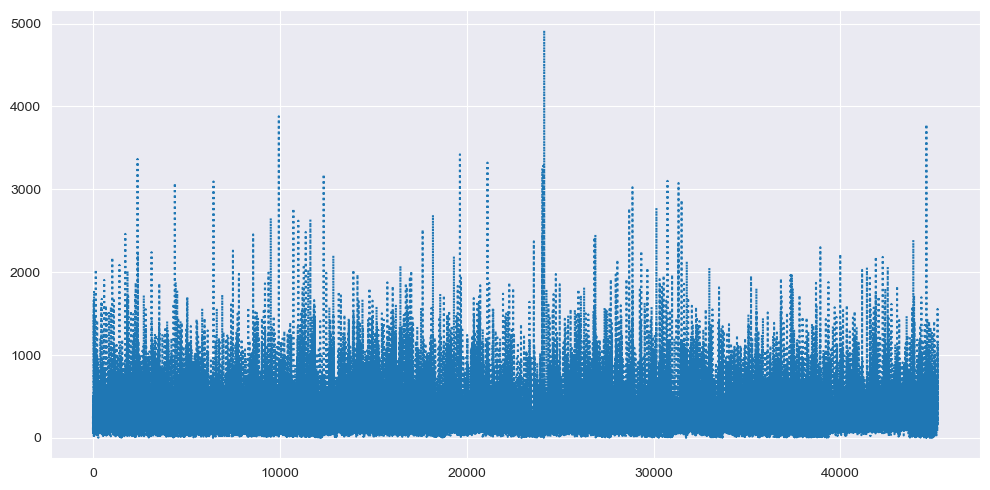

In [55]:
plt.plot(df['duration'], ls = ':')

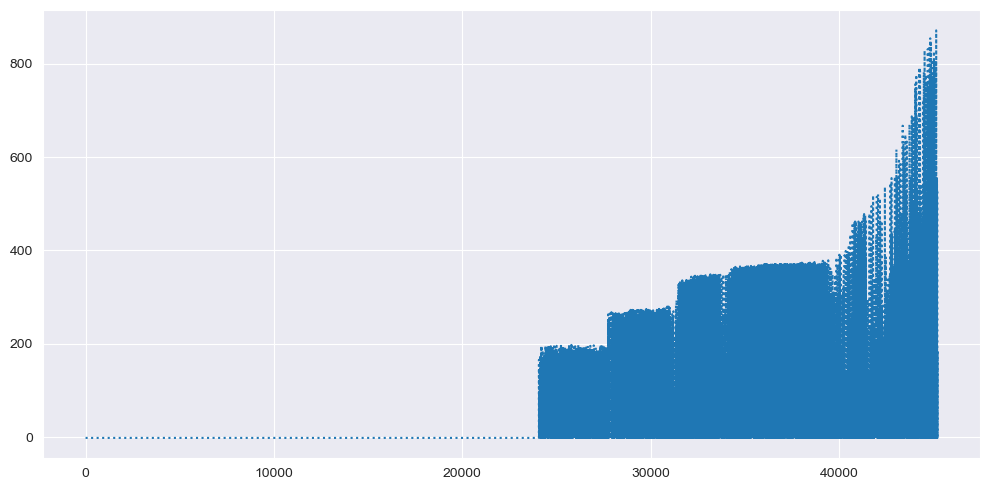

In [56]:
plt.plot(df['pdays'], ls = ':')

Text(0.5, 1.0, 'A Histogram of PDay')

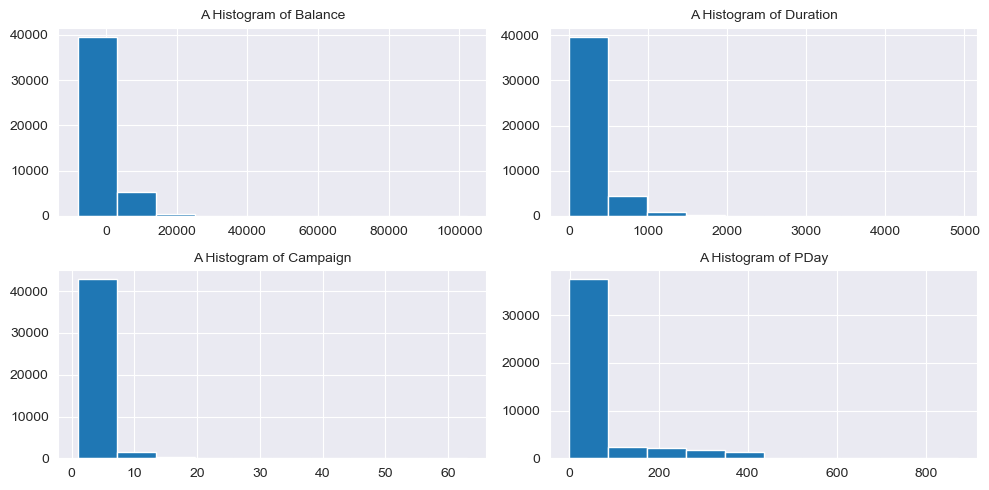

In [57]:
plt.rcParams["figure.figsize"] = [10,5]
plt.rcParams["figure.autolayout"] = True

plt.subplot(2,2,1)
plt.hist(df['balance'])
plt.title('A Histogram of Balance',fontsize = 10)

plt.subplot(2,2,2)
plt.hist(df['duration'])
plt.title('A Histogram of Duration',fontsize = 10)

plt.subplot(2,2,3)
plt.hist(df['campaign'])
plt.title('A Histogram of Campaign',fontsize = 10)

plt.subplot(2,2,4)
plt.hist(df['pdays'])
plt.title('A Histogram of PDay',fontsize = 10)

In [58]:
## Split x and Y

x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x

,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,2143,yes,no,261,1,-1,0,unknown
1,29,yes,no,151,1,-1,0,unknown
2,2,yes,yes,76,1,-1,0,unknown
3,1506,yes,no,92,1,-1,0,unknown
4,1,no,no,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...
45206,825,no,no,977,3,-1,0,unknown
45207,1729,no,no,456,2,-1,0,unknown
45208,5715,no,no,1127,5,184,3,success
45209,668,no,no,508,4,-1,0,unknown


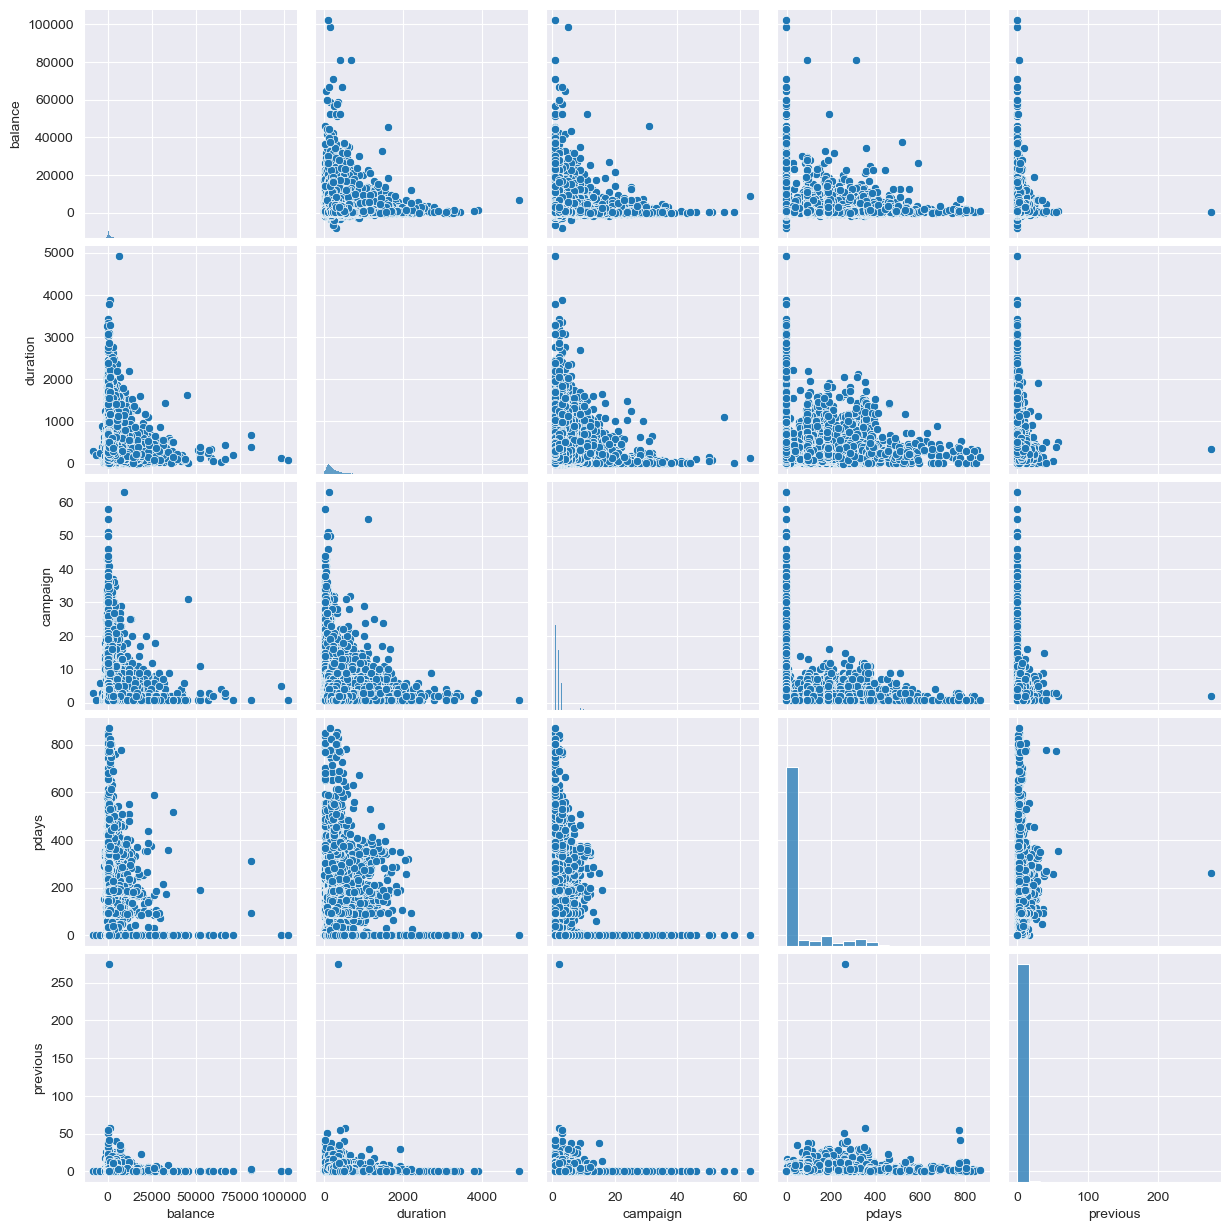

In [59]:
sns.set_style(style='darkgrid')
sns.pairplot(x)
plt.show()

In [60]:
df=pd.get_dummies(df,columns=['housing','loan','poutcome'])
df

,balance,duration,campaign,pdays,previous,y,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2143,261,1,-1,0,no,False,True,True,False,False,False,False,True
1,29,151,1,-1,0,no,False,True,True,False,False,False,False,True
2,2,76,1,-1,0,no,False,True,False,True,False,False,False,True
3,1506,92,1,-1,0,no,False,True,True,False,False,False,False,True
4,1,198,1,-1,0,no,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,3,-1,0,yes,True,False,True,False,False,False,False,True
45207,1729,456,2,-1,0,yes,True,False,True,False,False,False,False,True
45208,5715,1127,5,184,3,yes,True,False,True,False,False,False,True,False
45209,668,508,4,-1,0,no,True,False,True,False,False,False,False,True


In [61]:
df['y'].replace('no','0',inplace=True)
df['y'].replace('yes','1',inplace=True)
df

,balance,duration,campaign,pdays,previous,y,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,2143,261,1,-1,0,0,False,True,True,False,False,False,False,True
1,29,151,1,-1,0,0,False,True,True,False,False,False,False,True
2,2,76,1,-1,0,0,False,True,False,True,False,False,False,True
3,1506,92,1,-1,0,0,False,True,True,False,False,False,False,True
4,1,198,1,-1,0,0,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,3,-1,0,1,True,False,True,False,False,False,False,True
45207,1729,456,2,-1,0,1,True,False,True,False,False,False,False,True
45208,5715,1127,5,184,3,1,True,False,True,False,False,False,True,False
45209,668,508,4,-1,0,0,True,False,True,False,False,False,False,True


In [62]:
df.columns

Index(['balance', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [63]:
df.loc[:,['balance', 'duration', 'campaign', 'pdays', 'previous','housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_unknown','y']]

,balance,duration,campaign,pdays,previous,housing_no,housing_yes,loan_no,loan_yes,poutcome_unknown,y
0,2143,261,1,-1,0,False,True,True,False,True,0
1,29,151,1,-1,0,False,True,True,False,True,0
2,2,76,1,-1,0,False,True,False,True,True,0
3,1506,92,1,-1,0,False,True,True,False,True,0
4,1,198,1,-1,0,True,False,True,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,3,-1,0,True,False,True,False,True,1
45207,1729,456,2,-1,0,True,False,True,False,True,1
45208,5715,1127,5,184,3,True,False,True,False,False,1
45209,668,508,4,-1,0,True,False,True,False,True,0


In [64]:
df.isnull().sum()

balance             0
duration            0
campaign            0
pdays               0
previous            0
y                   0
housing_no          0
housing_yes         0
loan_no             0
loan_yes            0
poutcome_failure    0
poutcome_other      0
poutcome_success    0
poutcome_unknown    0
dtype: int64

In [65]:
# importing ordinal and label encoder to convert catergorical column in 0 and 1

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [66]:
oe = OrdinalEncoder()
le = LabelEncoder()

In [67]:
cat_col = x.select_dtypes(object).columns
cat_col

Index(['housing', 'loan', 'poutcome'], dtype='object')

In [68]:
x[cat_col] = oe.fit_transform(x[cat_col])
x

,balance,housing,loan,duration,campaign,pdays,previous,poutcome
0,2143,1.0,0.0,261,1,-1,0,3.0
1,29,1.0,0.0,151,1,-1,0,3.0
2,2,1.0,1.0,76,1,-1,0,3.0
3,1506,1.0,0.0,92,1,-1,0,3.0
4,1,0.0,0.0,198,1,-1,0,3.0
...,...,...,...,...,...,...,...,...
45206,825,0.0,0.0,977,3,-1,0,3.0
45207,1729,0.0,0.0,456,2,-1,0,3.0
45208,5715,0.0,0.0,1127,5,184,3,2.0
45209,668,0.0,0.0,508,4,-1,0,3.0


In [69]:
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 0, 0])

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
A = df.iloc[:,:-1]
B = df['y']

In [72]:
xtrain,xtest,ytrain,ytest = train_test_split(A,B,train_size=0.75,random_state=1)

In [73]:
xtrain

,balance,duration,campaign,pdays,previous,y,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success
32731,137,343,2,316,3,0,False,True,True,False,False,True,False
1498,830,246,2,-1,0,0,False,True,True,False,False,False,False
17532,1103,148,15,-1,0,0,False,True,False,True,False,False,False
8166,229,214,2,-1,0,0,False,True,True,False,False,False,False
15495,2858,247,5,-1,0,0,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,1830,318,3,-1,0,0,True,False,True,False,False,False,False
32511,528,233,2,-1,0,0,False,True,True,False,False,False,False
5192,4191,363,6,-1,0,0,True,False,True,False,False,False,False
12172,1783,11,11,-1,0,0,True,False,True,False,False,False,False


In [74]:
#Model Bulding

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
lg = LogisticRegression()

In [77]:
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

In [78]:
len(xtest)

11303

In [79]:
print('Actual B: ', ytest[:13].values)
print('Predict B:', ypred[:13])

Actual B:  ['0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0']
Predict B: ['0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0' '0']


In [80]:
# Testing Model Accuracy

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [82]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9998
           1       0.97      0.92      0.95      1305

    accuracy                           0.99     11303
   macro avg       0.98      0.96      0.97     11303
weighted avg       0.99      0.99      0.99     11303



In [83]:
print(confusion_matrix(ytest, ypred))

[[9966   32]
 [ 101 1204]]


In [84]:
a=ytest
b=ypred

In [85]:
# calculating the Accuracy of the model by (a+d)/(a+b+c+d)

(9966+32)/(9966+32+101+1204)

0.8845439263912236

* Accuracy of the model is 88.45%

In [86]:
# Accuracy by built in function

print(np.round(lg.score(xtrain, ytrain),2))
print(np.round(lg.score(xtest, ytest),2))

0.99
0.99


In [87]:
print(xtrain.shape)   # prints (n_samples_train, n_features)
print(xtest.shape)    # prints (n_samples_test, n_features)


(33908, 13)
(11303, 13)


In [88]:
relevant_features = [0, 2, 4, 6, 8, 10, 11, 12]  # select only the relevant features
X_train_relevant = xtrain.to_numpy()[:, relevant_features]  # select the relevant features from the training data
X_test_relevant = xtest.to_numpy()[:, relevant_features]    # select the relevant features from the test data
   # select the relevant features from the test data

In [89]:
lg = LogisticRegression()
lg.fit(X_train_relevant, ytrain)

y_pred = lg.predict(X_test_relevant)

In [90]:
ytest = ytest.astype(int)

In [91]:
auc = roc_auc_score(ytest, lg.predict_proba(X_test_relevant)[:, 1])

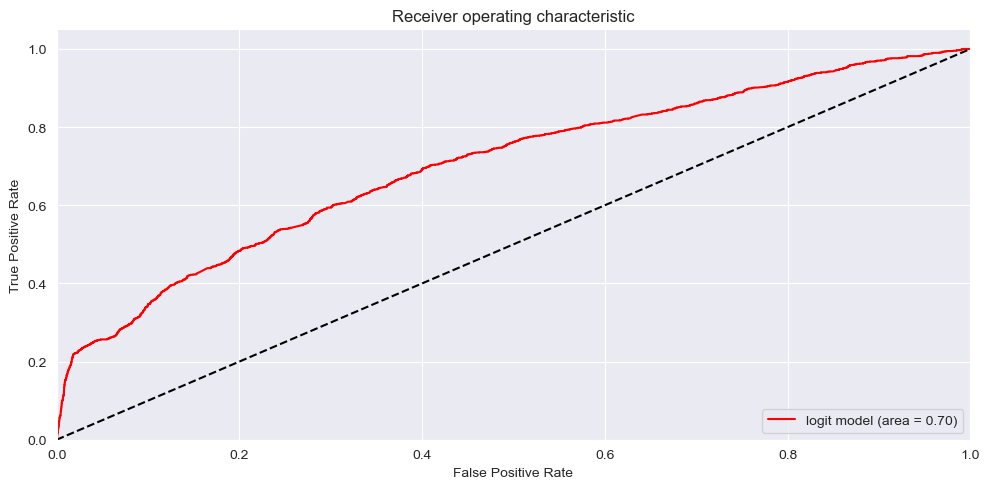

In [92]:
from sklearn.metrics import roc_curve, roc_auc_score

# convert ytest to integers
ytest = ytest.astype(int)

# predict probabilities for positive class
y_pred = lg.predict_proba(X_test_relevant)[:, 1]

fpr, tpr, thresholds = roc_curve(ytest, y_pred)
auc = roc_auc_score(ytest, y_pred)

plt.plot(fpr, tpr, color='red', label='logit model (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Text(9.444444444444452, 0.5, 'Predicted Values')

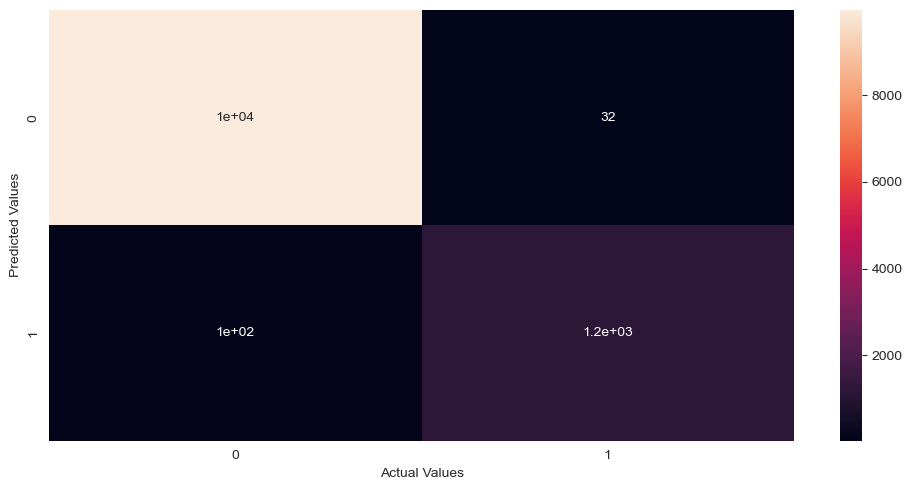

In [93]:
sns.heatmap(confusion_matrix(a.astype(int), b.astype(int)), annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')